In [1]:
import pandas as pd
from autoviz import AutoViz_Class

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Imported v0.1.604. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


### Dataset

In [2]:
data = pd.read_csv('../data/productivity+prediction+of+garment+employees.csv')
target_variable = 'actual_productivity'
print(data.shape)
data.head()

(1197, 15)


date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [3]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
# add hours to the date tiem field
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
data['Month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.day_of_week
data['day_of_month'] = data['date'].dt.day
cols_to_convert = ['over_time', 'incentive']
data[cols_to_convert] = data[cols_to_convert].astype('float')

In [5]:
# date					:	Date in MM-DD-YYYY
# day					:Day of the Week
# quarter					:	A portion of the month. A month was divided into four quarters
# department				:	Associated department with the instance
# team_no					:	Associated team number with the instance
# no_of_workers			:	Number of workers in each team
# no_of_style_change		:	Number of changes in the style of a particular product
# targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.
# smv						:	Standard Minute Value, it is the allocated time for a task
# wip						:	Work in progress. Includes the number of unfinished items for products
# over_time				:	Represents the amount of overtime by each team in minutes
# incentive				:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
# idle_time				:	The amount of time when the production was interrupted due to several reasons
# idle_men				:	The number of workers who were idle due to production interruption
# actual_productivity		:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

data['wip'] = data['wip'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   float64       
 9   incentive              1197 non-null   float64       
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [6]:
# found some padding in the department feature
data.department = data.department.str.strip()
data.department.value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

### Some manual visualization

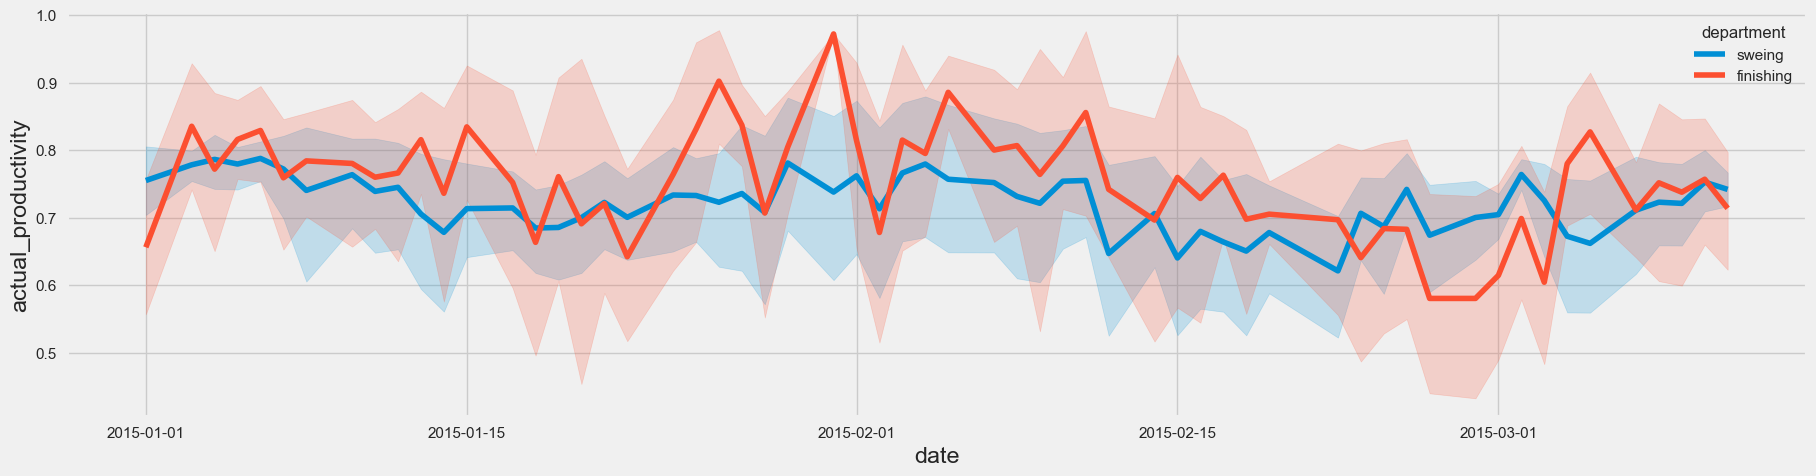

In [7]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(data=data, x="date", y=target_variable, ax=ax, hue='department')
plt.show()

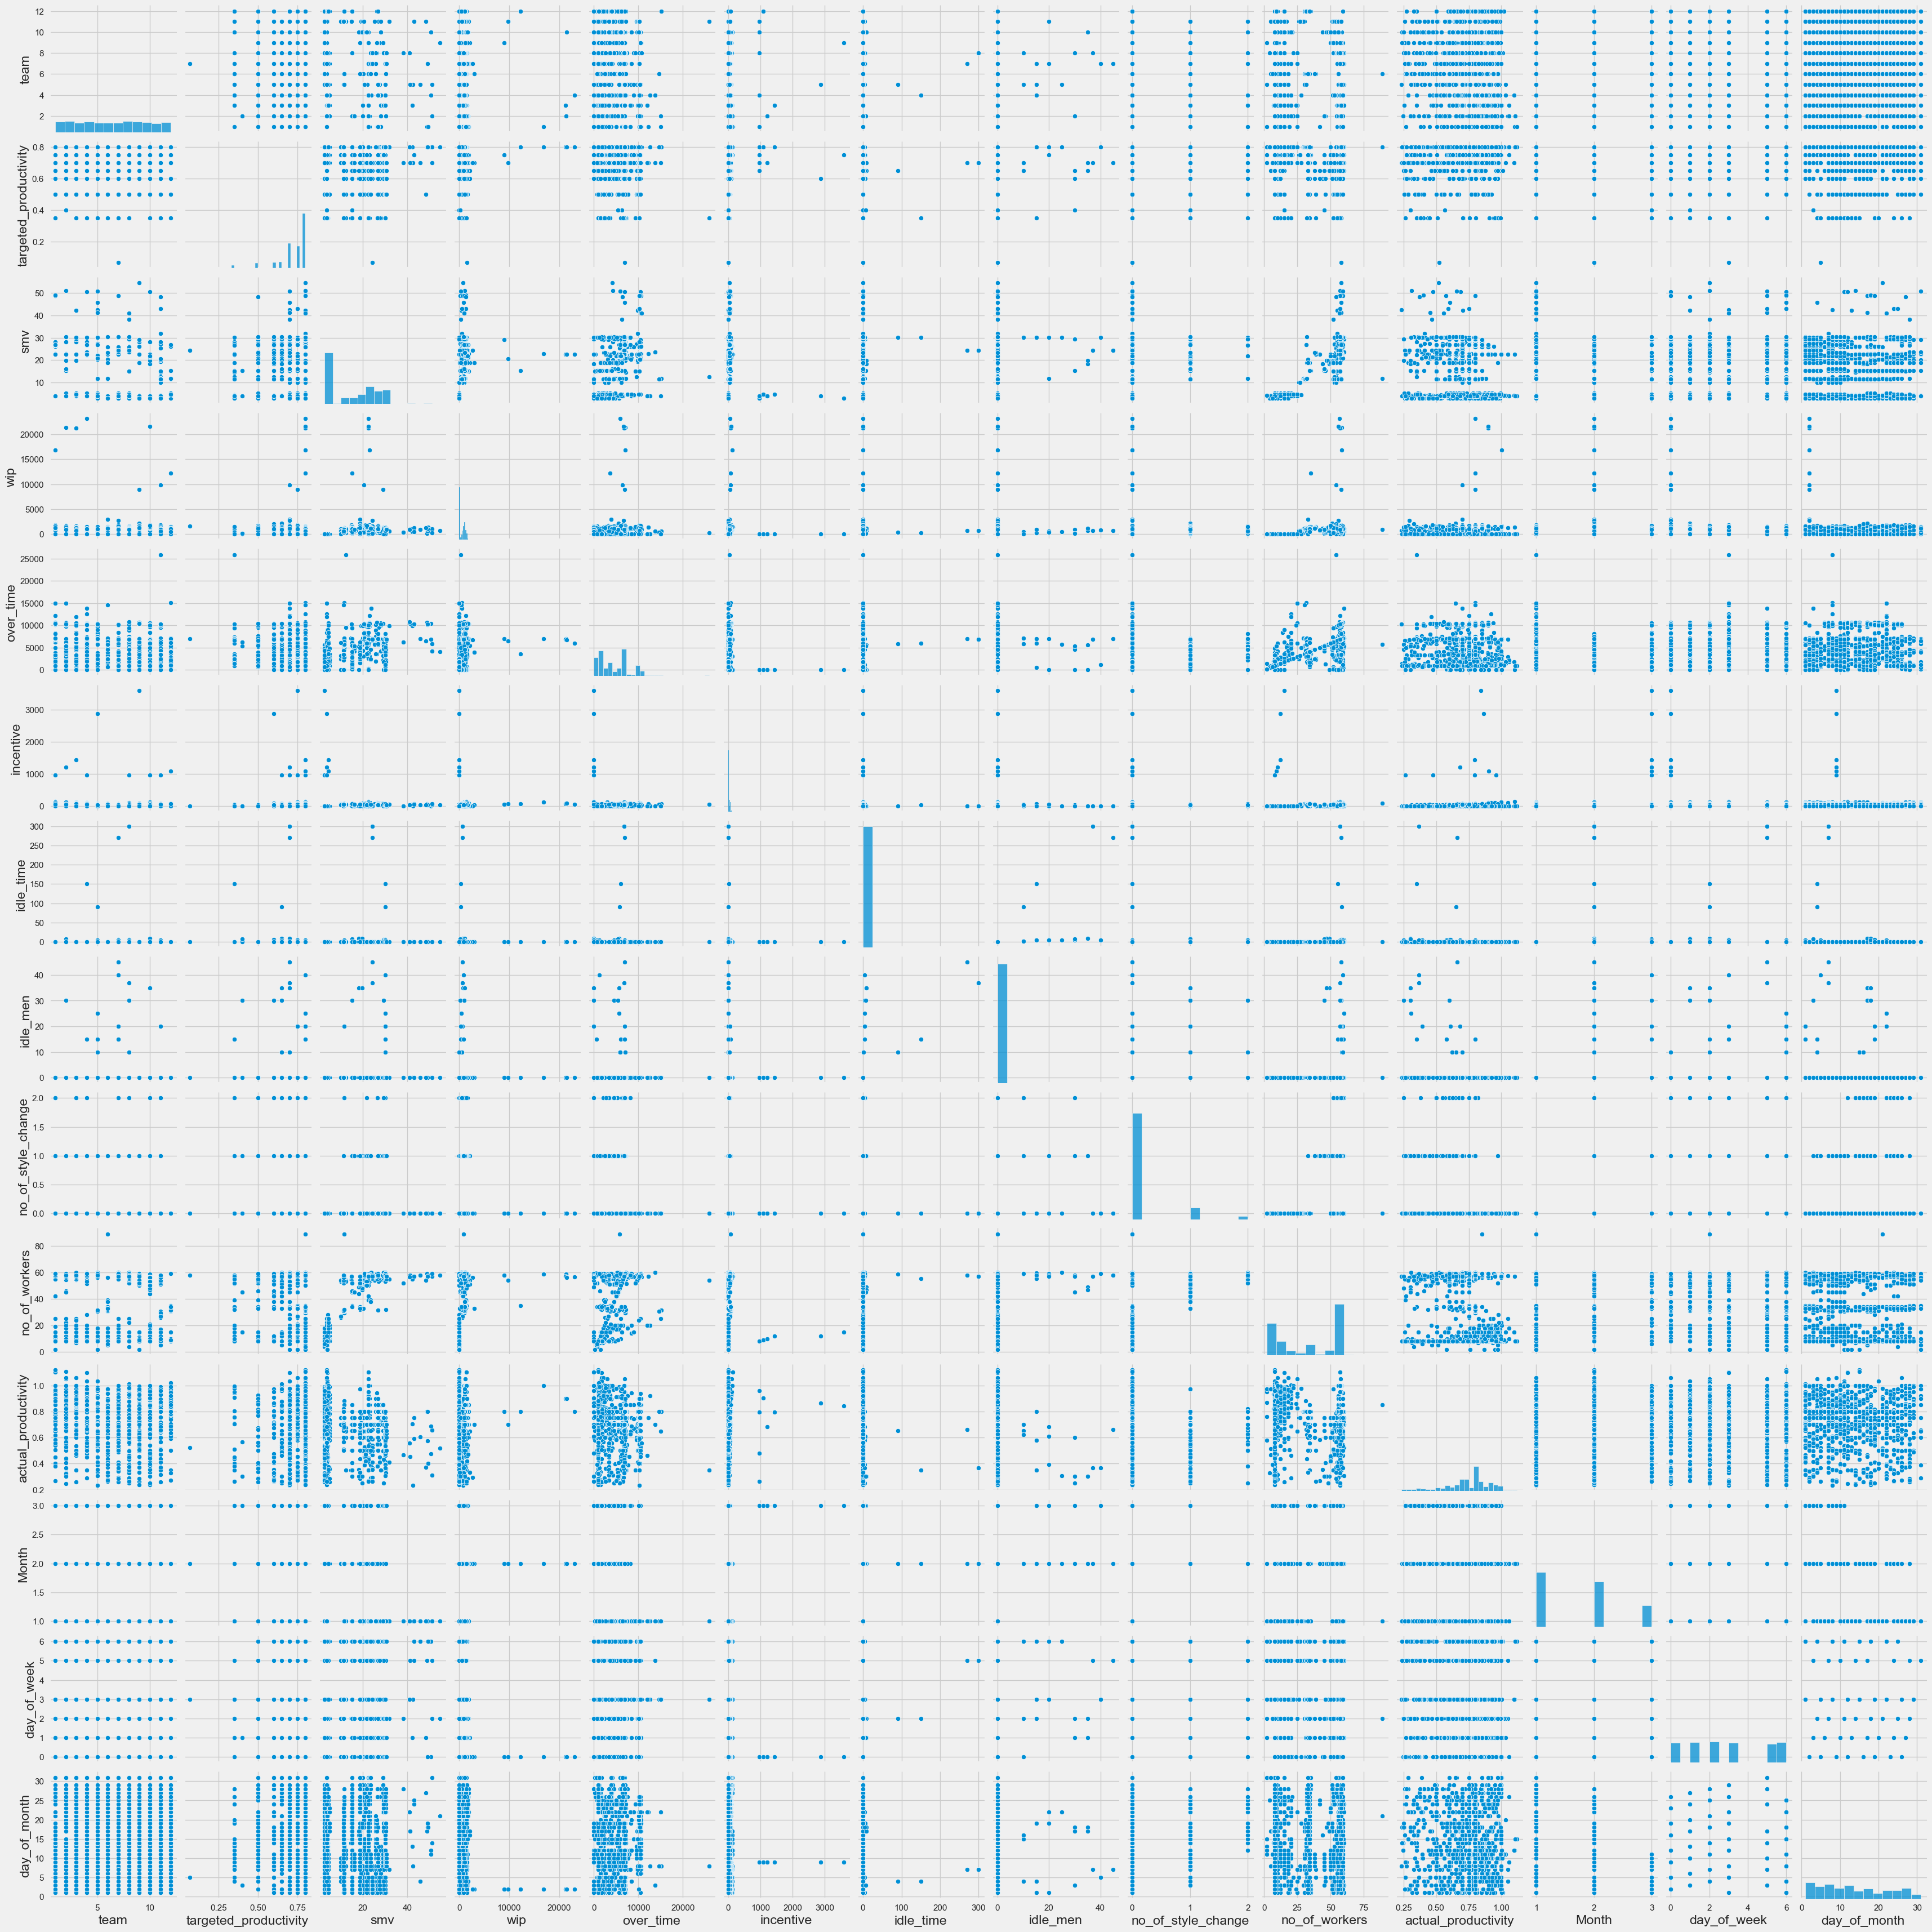

In [8]:
sns.pairplot(data)

### Auto Visualization

In [9]:
AV = AutoViz_Class()
dft = AV.AutoViz(
    "",
    sep=',',
    depVar=target_variable,
    dfte=data,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="bokeh",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

Shape of your Data Set loaded: (1197, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    17 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################


Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['smv', 'wip', ...], value='smv', width=250)
            [1] VSpacer()

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['smv', 'wip', ...], value='smv')
        [1] Select(name='Y-Axis', options=['smv', 'wip', ...], value='wip')
        [2] Select(name='Color', options=['None', 'actual_productiv...], value='None')
    [1] ParamFunction(function, _pane=HoloViews)

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', width=700)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['quarter', 'day', ...], value='quarter', width=250)
            [1] VSpacer()

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['no_of_workers', ...], value='no_of_workers', width=250)
            [1] VSpacer()

HoloViews(DynamicMap)

HoloViews(Violin, height=300, sizing_mode='fixed', width=700)

HoloViews(Overlay, height=500, sizing_mode='fixed', width=600)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['date'], value='date')
        [1] Select(name='Y-Axis', options=['smv', 'wip', ...], value='smv')
    [1] ParamFunction(function, _pane=HoloViews)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['quarter', 'day', ...], value='quarter')
        [1] Select(name='Y-Axis', options=['smv', 'wip', ...], value='smv')
    [1] ParamFunction(function, _pane=HoloViews)

Time to run AutoViz (in seconds) = 4
